In [1]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds

from pandas.tseries.offsets import *

%matplotlib inline  

In [2]:
b1 = tsds.generate_random_TS(500 , 'D', 4242, "linear" , 52 , "" , 0.01)


GENERATING_RANDOM_DATASET Signal_500_D_4242_linear_52__0.01_20


In [3]:
pd.date_range('2000-1-1', periods=10000, freq='D')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2027-05-09', '2027-05-10', '2027-05-11', '2027-05-12',
               '2027-05-13', '2027-05-14', '2027-05-15', '2027-05-16',
               '2027-05-17', '2027-05-18'],
              dtype='datetime64[ns]', length=10000, freq='D')

In [4]:
df = b1.mPastData
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 26 columns):
Date                                    488 non-null datetime64[ns]
GeneratedTrend                          488 non-null float64
GeneratedCycle                          488 non-null float64
Noise                                   488 non-null float64
Signal                                  488 non-null float64
exog_1                                  488 non-null object
exog_2                                  488 non-null object
exog_3                                  488 non-null object
exog_4                                  488 non-null object
exog_5                                  488 non-null object
exog_6                                  488 non-null object
exog_7                                  488 non-null object
exog_8                                  488 non-null object
exog_9                                  488 non-null object
exog_10                                 488

In [5]:
t = df.Date.iloc[0]

In [6]:
type(t.second)

int

In [7]:
df.tail()

,Date,GeneratedTrend,GeneratedCycle,Noise,Signal,exog_1,exog_2,exog_3,exog_4,exog_5,...,exog_12,exog_13,exog_14,exog_15,exog_16,exog_17,exog_18,exog_19,exog_20,Signal_500_D_4242_linear_52__0.01_20
483,2001-04-28,-600.405926,490.384615,-0.006021,-110.027332,,,,,,...,,,,,,,,,A-1,-110.027332
484,2001-04-29,-601.286579,240.384615,-0.008421,-360.910385,,,,,,...,,,,,,,,,,-360.910385
485,2001-04-30,-602.167232,451.923077,-0.004590,-150.248746,,,,,A-1,...,,,,,A-1,,,,,-150.248746
486,2001-05-01,-603.047885,230.769231,-0.005932,-372.284586,,A-3,,A-3,,...,,,,,,A-3,,,,-372.284586
487,2001-05-02,-603.928538,471.153846,0.006369,-132.768323,,,A-1,A-1,,...,,A-1,,,A-1,,,,,-132.768323


In [8]:
df.describe()

,GeneratedTrend,GeneratedCycle,Noise,Signal,Signal_500_D_4242_linear_52__0.01_20
count,488.000000,488.000000,488.000000,488.000000,488.000000
mean,-389.489526,237.251734,0.000482,-152.237310,-152.237310
std,124.187690,149.073770,0.010357,194.388941,194.388941
min,-603.928538,0.000000,-0.028263,-577.659749,-577.659749
25%,-496.709032,115.384615,-0.006845,-290.398953,-290.398953
50%,-389.489526,240.384615,0.000747,-152.510814,-152.510814
75%,-282.270020,384.615385,0.007636,-13.221182,-13.221182
max,-175.050513,490.384615,0.029351,302.131079,302.131079


In [9]:
df['Date'].apply(lambda x : x.second).std()


0.0

In [10]:
sec1 = df['Date'].apply(lambda x : x.second)
sec1.nunique()

1

In [11]:

lAutoF = autof.cForecastEngine()
lAutoF


In [12]:
lAutoF.train(df , 'Date' , 'Signal', 12)

START_TRAINING 'Signal'
END_TRAINING_TIME_IN_SECONDS 'Signal' 57.126999378204346


In [13]:
lAutoF.getModelInfo()

TIME_DETAIL TimeVariable='Date' TimeMin=2000-01-01 00:00:00 TimeMax=2001-01-14 00:00:00 TimeDelta=1 days 00:00:00 Estimation = (0 , 380) Validation = (380 , 476) Test = (476 , 488) Horizon=12
SIGNAL_DETAIL SignalVariable='Signal' Min=-577.659749102 Max=302.131079474  Mean=-152.237310091 StdDev=194.189669849
BEST_TRANSOFORMATION_TYPE ''
BEST_DECOMPOSITION  'Signal_LinearTrend_residue_zeroCycle_residue_AR(122)' [LinearTrend + NoCycle + AR(122)]
TREND_DETAIL 'Signal_LinearTrend' [LinearTrend]
CYCLE_DETAIL 'Signal_LinearTrend_residue_zeroCycle' [NoCycle]
AUTOREG_DETAIL 'Signal_LinearTrend_residue_zeroCycle_residue_AR(122)' [AR(122)]
MODEL_MAPE MAPE_Fit=0.4721 MAPE_Forecast=0.0194 MAPE_Test=0.0142
MODEL_L2 L2_Fit=47.6981156043 L2_Forecast=5.28860250386 L2_Test=4.52187309183
MODEL_COMPLEXITY  138
AR_MODEL_DETAIL_START
AR_MODEL_COEFF 1 Signal_LinearTrend_residue_zeroCycle_residue_Lag52 1.02383119603
AR_MODEL_COEFF 2 Signal_LinearTrend_residue_zeroCycle_residue_Lag67 0.237149011162
AR_MODEL_CO

In [14]:
lAutoF.mSignalDecomposition.mBestModel.getFormula()

'LinearTrend + NoCycle + AR(122)'

In [15]:
lAutoF.mSignalDecomposition.mTrPerfDetails

,Transformation,Model,Complexity,FitCount,FitL2,FitMAPE,ForecastCount,ForecastL2,ForecastMAPE,TestCount,TestL2,TestMAPE
18,Signal,Signal_LinearTrend_residue_zeroCycle_residue_A...,138,380,47.698116,0.4721,96,5.288603,0.0194,12,4.521873,0.0142
21,Signal,Signal_Lag1Trend_residue_zeroCycle_residue_AR(...,154,380,49.679619,0.6275,96,6.660358,0.0234,12,5.413411,0.0184
45,Signal,Signal_Lag1Trend_residue_Seasonal_DayOfWeek_re...,158,380,49.659975,0.6272,96,6.946886,0.0273,12,5.043760,0.0165
15,Signal,Signal_LinearTrend_residue_Seasonal_DayOfWeek_...,142,380,47.965776,0.4744,96,7.552496,0.0315,12,6.028210,0.0194
36,Signal,Signal_PolyTrend_residue_zeroCycle_residue_AR(...,138,380,47.750027,0.4704,96,10.421690,0.0403,12,14.525833,0.0619
19,Signal,Signal_ConstantTrend_residue_zeroCycle_residue...,122,380,47.790364,0.5176,96,11.271748,0.0465,12,9.418231,0.0414
27,Signal,Signal_PolyTrend_residue_Seasonal_DayOfWeek_re...,142,380,47.891638,0.4781,96,11.418594,0.0405,12,15.995539,0.0671
38,Signal,Signal_ConstantTrend_residue_Seasonal_DayOfWee...,126,380,47.910324,0.5225,96,11.832657,0.0487,12,9.383465,0.0382
8,Signal,Signal_ConstantTrend_residue_bestCycle_byL2_re...,130,380,43.109425,0.6275,96,11.924528,0.0457,12,9.851573,0.0389
13,Signal,Signal_LinearTrend_residue_bestCycle_byL2_resi...,146,380,42.864904,0.6128,96,12.156500,0.0423,12,8.876755,0.0344


/usr/lib/python3/dist-packages/matplotlib/__init__.py:1359: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


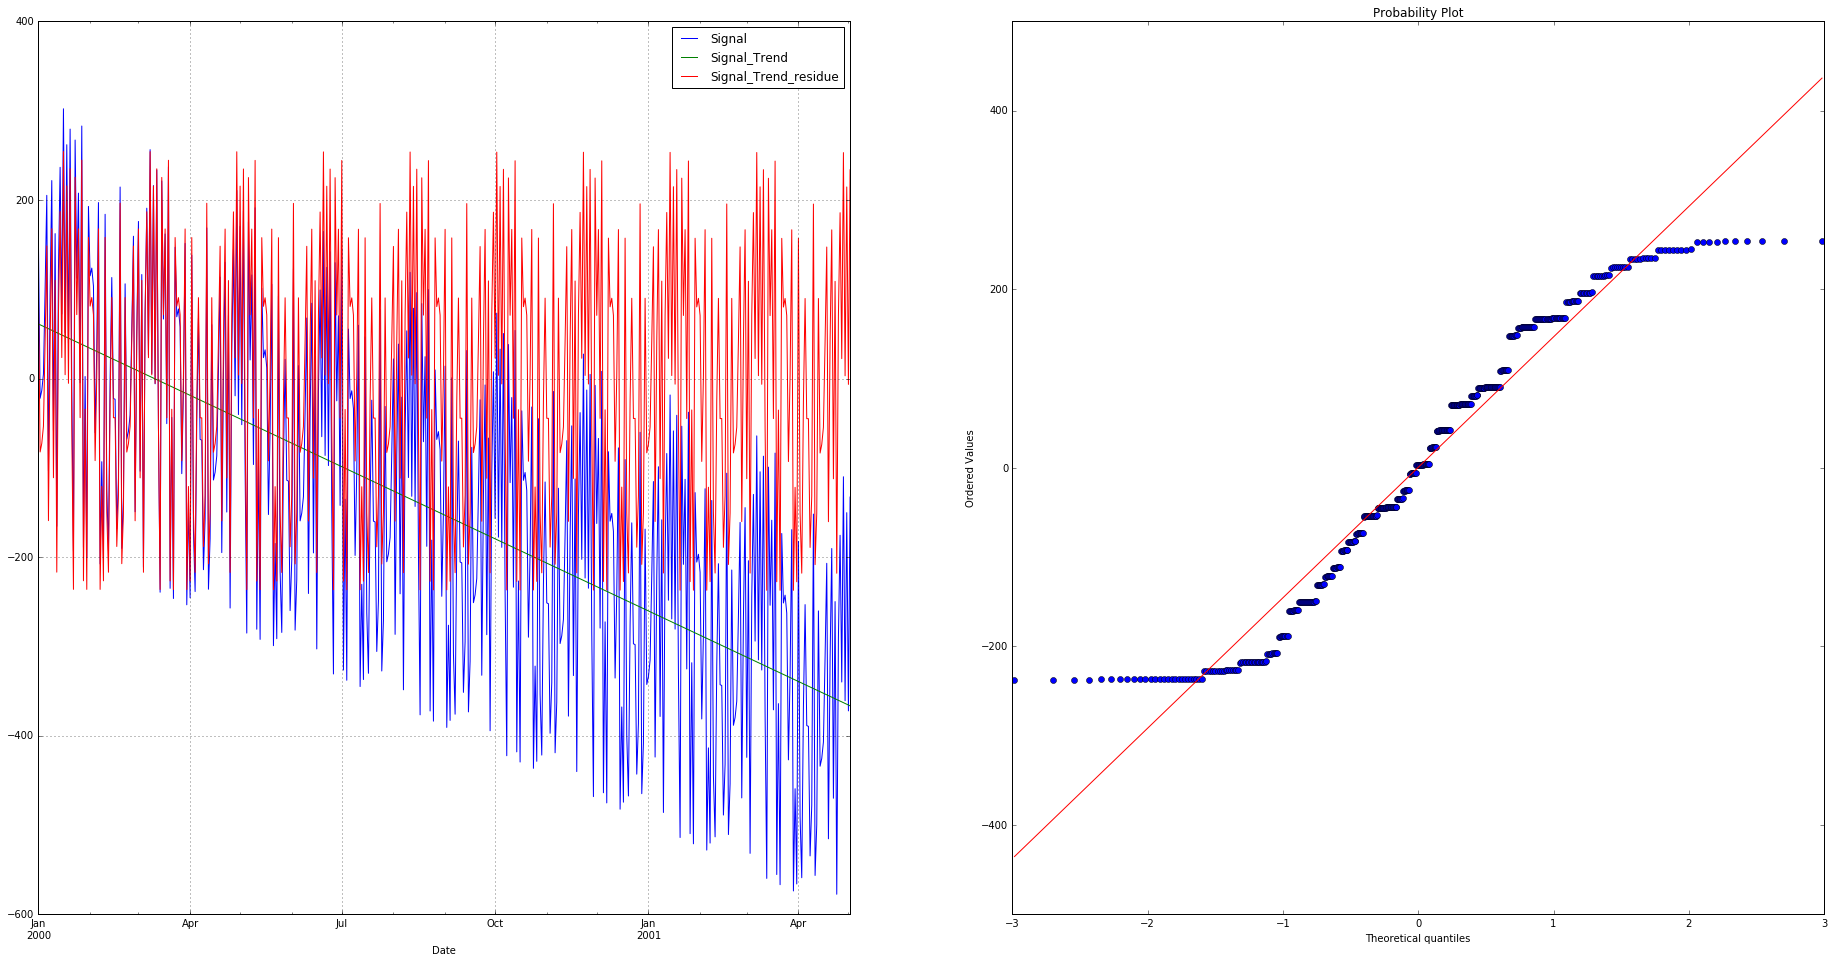

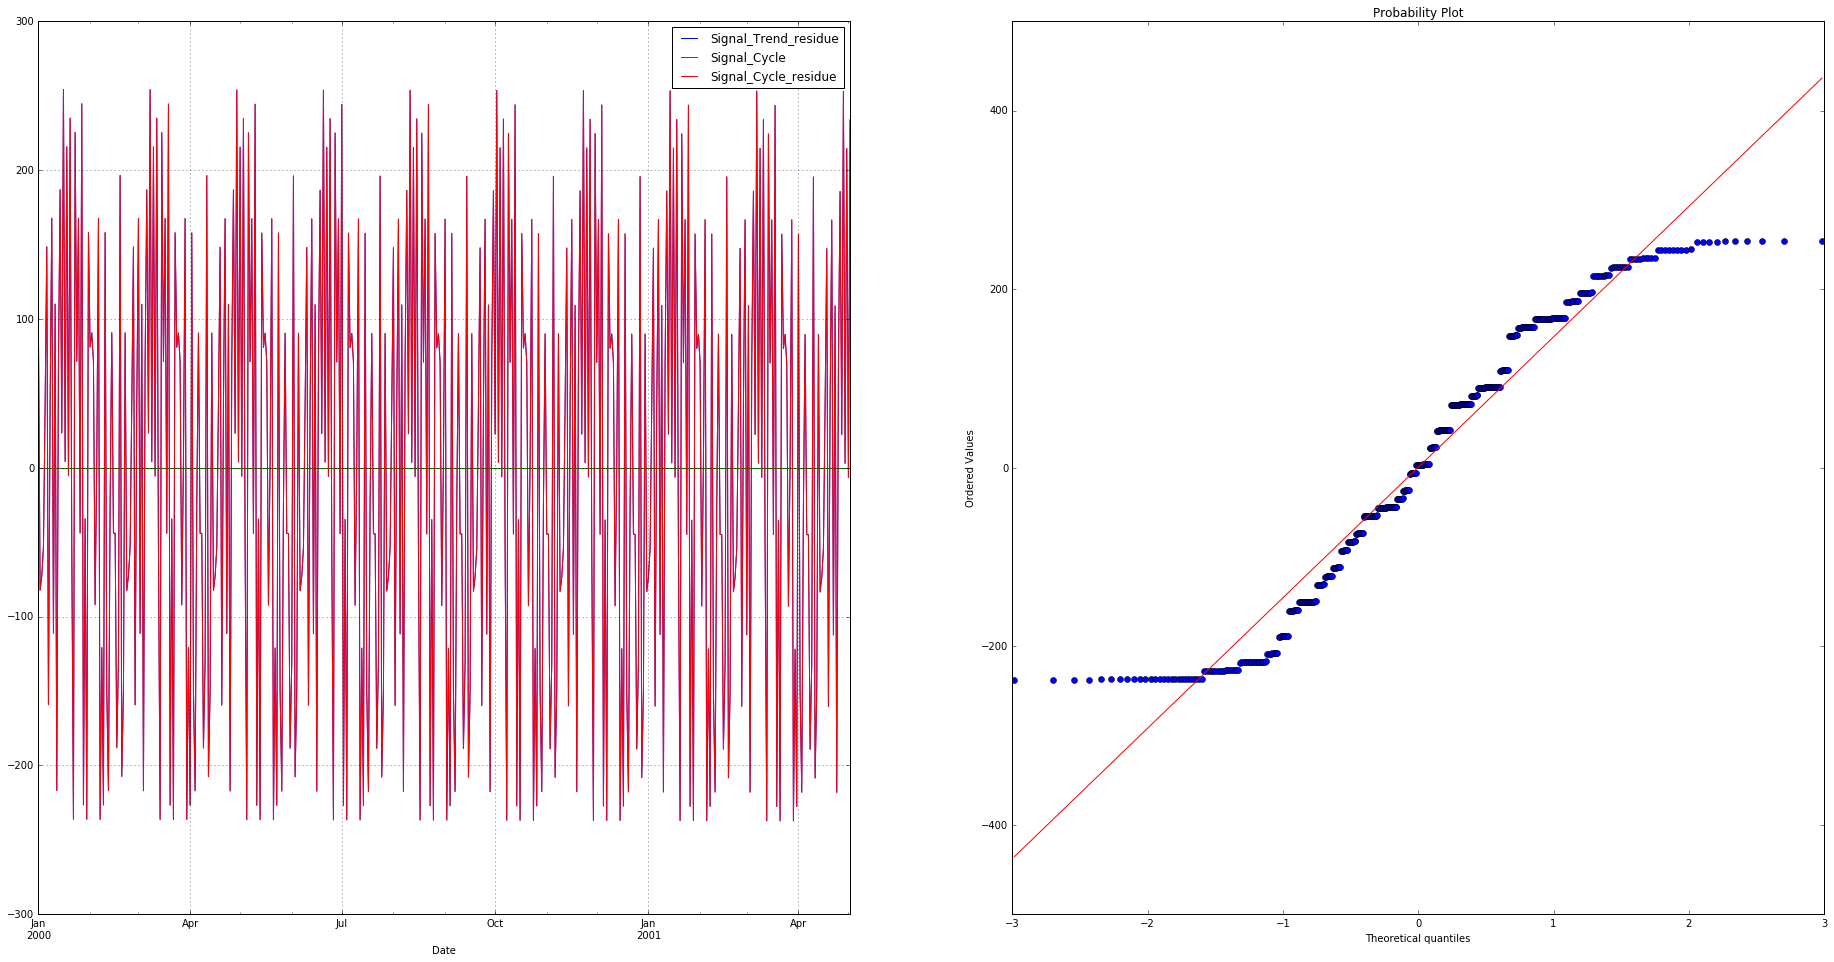

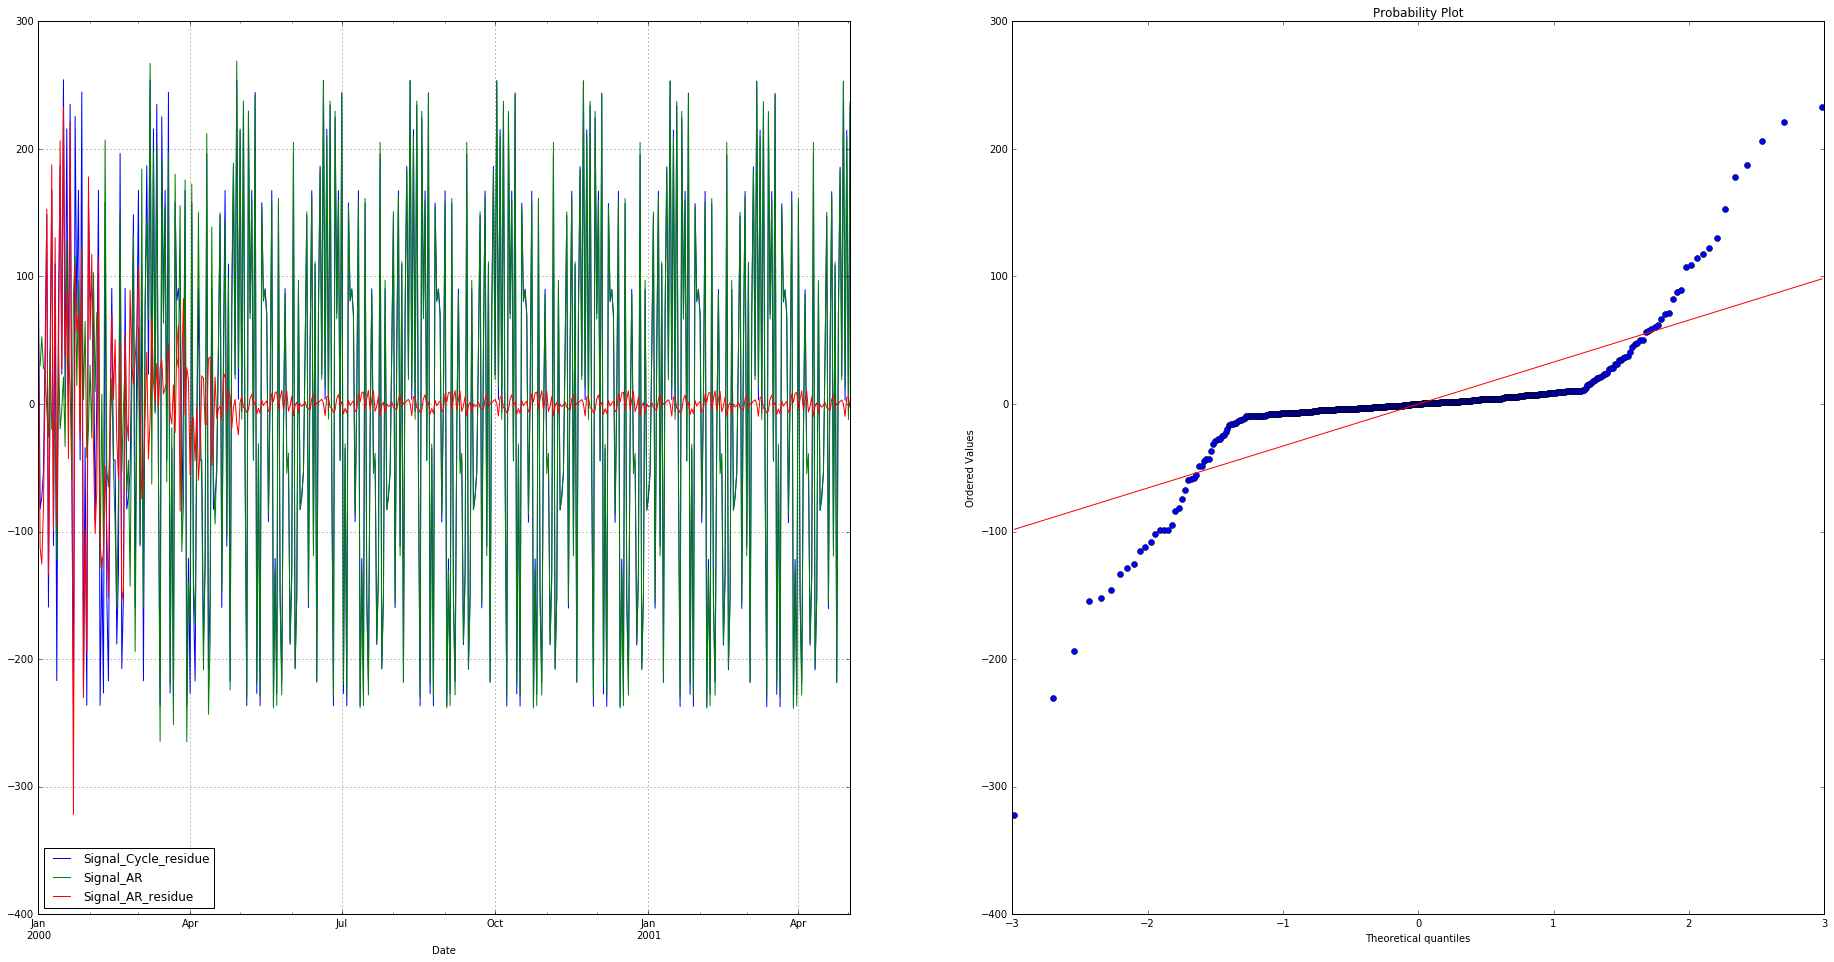

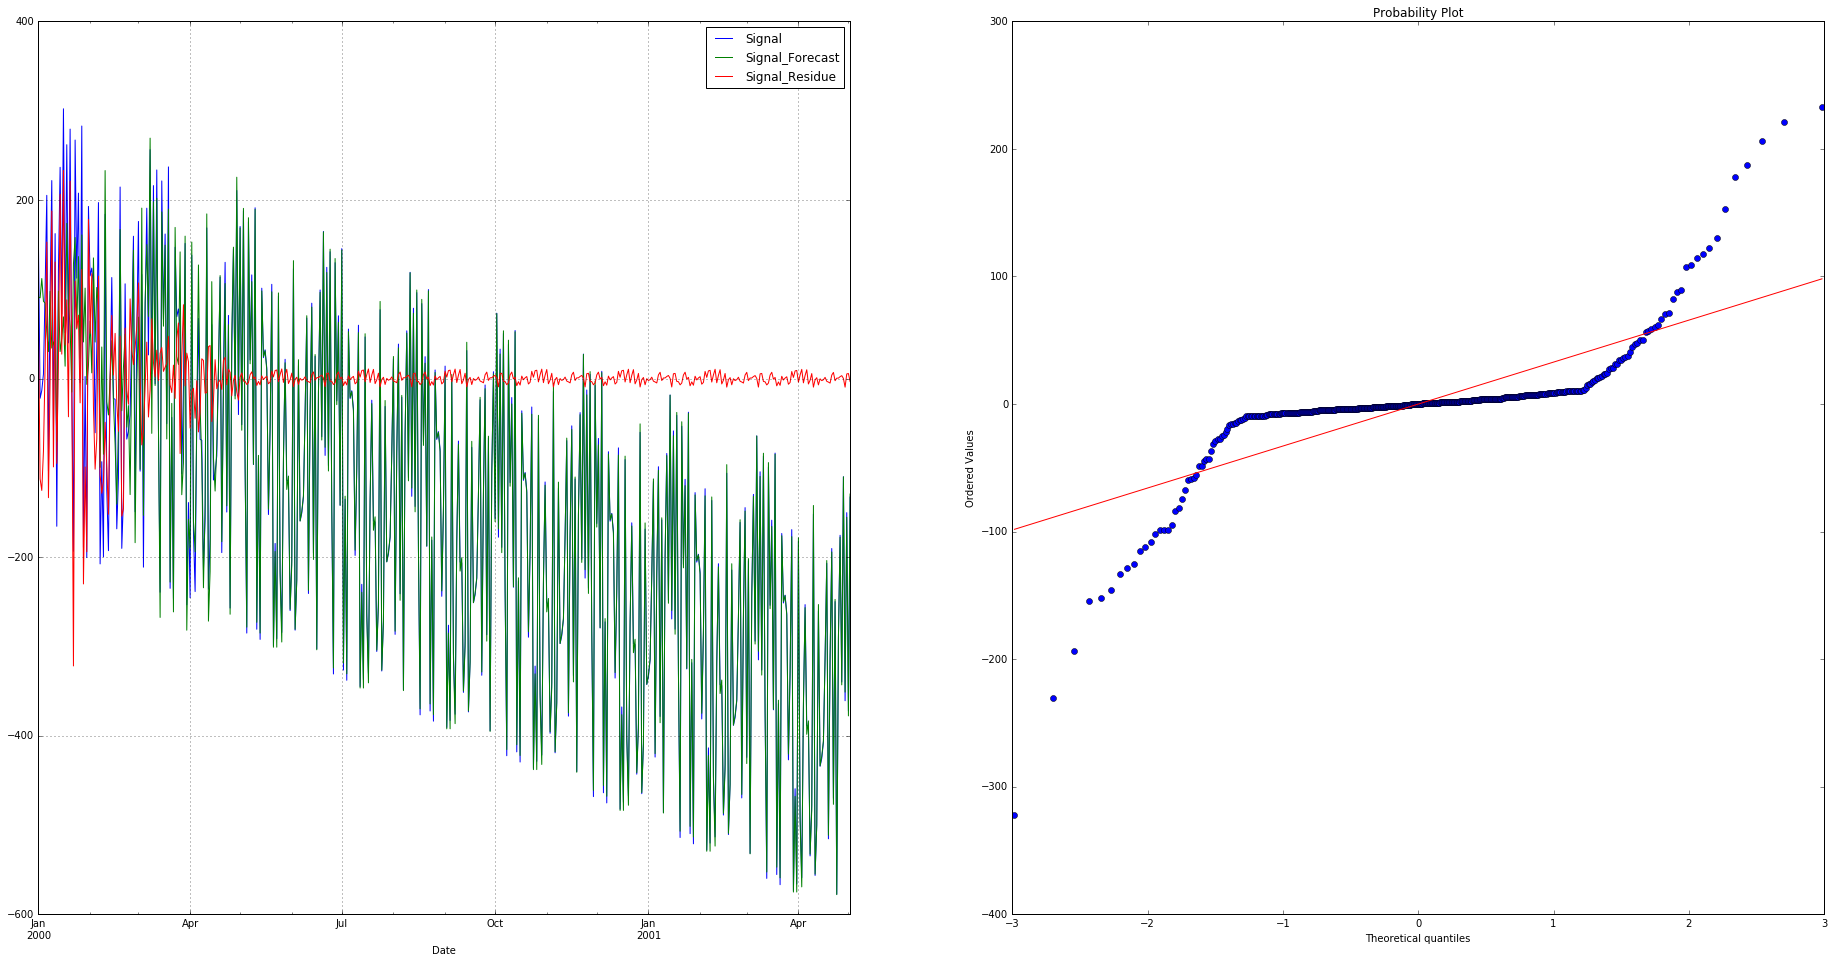

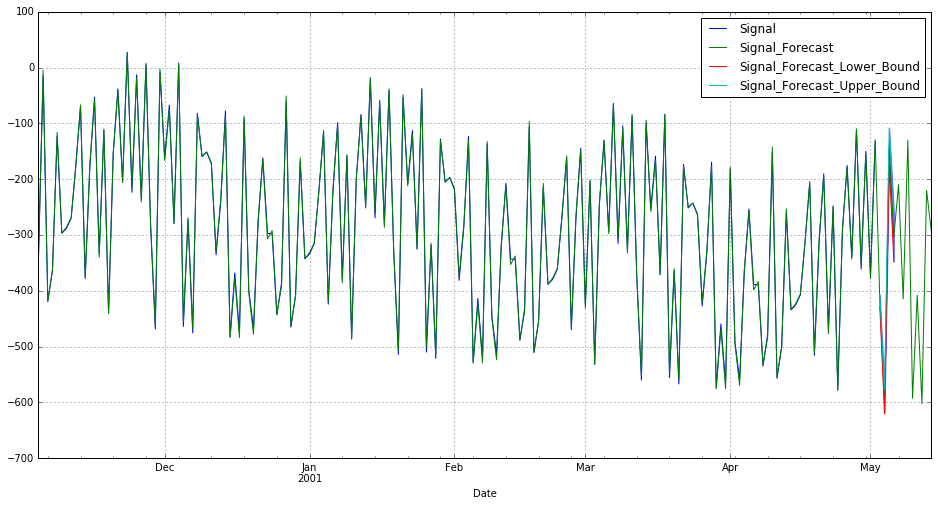

In [16]:
lAutoF.standrdPlots()